In [73]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

def solvepoisson(n):
    #Solves 2D Poisson Eqn with Dirichlet Boundary Conditions
    #Assembles the system matrix and right hand side
    h = 1.0 / n #Set up grid
    N = np.power((n+1),2)
    x = np.multiply(h,np.arange(0,n+1))
    y = x
    
    uexact = lambda (x,y) : np.divide(np.exp((-4.*np.power((x-0.3),2))),np.exp(9.*np.power((y-0.6),2))) #Exact Solution
    g = uexact #Solution at Boundaries = Exact Solution
    f = lambda (x,y) : np.multiply(np.exp(((-4.*np.power((x-0.3),2)) - (9.*np.power((y-0.6),2)))), (26. - np.power(((18.*y-10.8)),2)-np.power((8.*x-2.4),2))) #LHS
    
    umap = np.reshape(np.arange(0,N),(n+1,n+1))
    A = np.zeros((N,N))
    b = np.zeros((N,1))
    
    for j in range(0,n+1):
        for i in range(0,n+1):
            row = umap[i,j]
            if i == 0 or i == n or j == 0 or j == n: #Applies Dirichlet BC at Walls
                A[row,row] = 1.0
                b[row] = g([x[i],y[j]])
            else:
                A[row,row] = 4.0
                A[row,umap[i+1,j]] = -1.0
                A[row,umap[i-1,j]] = -1.0
                A[row,umap[i,j+1]] = -1.0
                A[row,umap[i,j-1]] = -1.0
                b[row] = f([x[i],y[j]])*np.power(h,2)
    return A,b

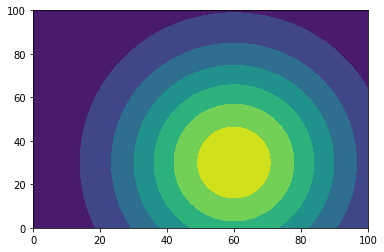

In [74]:
n = 100
A,b = solvepoisson(n)
solution = np.linalg.solve(A,b)

u = np.reshape(solution,(n+1,n+1))

plt.contourf(u)